In [1]:
import os
import shutil

In [2]:
pwd

'C:\\Users\\manoj\\Desktop\\Kaggle'

In [3]:
os.listdir()

['.ipynb_checkpoints', 'Dogs and Cats.ipynb', 'dogs cats', 'titanic_kaggle']

In [4]:
dir='C:\\Users\\manoj\\Desktop\\Kaggle'

In [7]:
cd=os.path.join(dir,'dogs cats')

In [8]:
os.listdir(cd)

['dogs-vs-cats.zip',
 'sampleSubmission.csv',
 'test1',
 'test1.zip',
 'train',
 'train.zip']

In [29]:
train_cat_names=['cat.{}.jpg'.format(str(i)) for i in range(1,1001)]
val_cat_names=['cat.{}.jpg'.format(str(i)) for i in range(1001,1501)]
test_cat_names=['cat.{}.jpg'.format(str(i)) for i in range(1501,2001)]

train_dog_names=['dog.{}.jpg'.format(str(i)) for i in range(1,1001)]
val_dog_names=['dog.{}.jpg'.format(str(i)) for i in range(1001,1501)]
test_dog_names=['dog.{}.jpg'.format(str(i)) for i in range(1501,2001)]

train_dir=os.path.join(cd,'train_dir')
#os.rmdir(train_dir)
os.mkdir(train_dir)

val_dir=os.path.join(cd,'val_dir')
#os.rmdir(val_dir)
os.mkdir(val_dir)

test_dir=os.path.join(cd,'test_dir')
#os.rmdir(test_dir)
os.mkdir(test_dir)

In [30]:
main_dir=os.path.join(cd,'train')

for each in train_cat_names :
    src=os.path.join(main_dir,each)
    dst=os.path.join(train_dir,each)
    shutil.copyfile(src,dst)
    
for each in train_dog_names :
    src=os.path.join(main_dir,each)
    dst=os.path.join(train_dir,each)
    shutil.copyfile(src,dst)
    
for each in val_cat_names :
    src=os.path.join(main_dir,each)
    dst=os.path.join(val_dir,each)
    shutil.copyfile(src,dst)
    
for each in val_dog_names :
    src=os.path.join(main_dir,each)
    dst=os.path.join(val_dir,each)
    shutil.copyfile(src,dst)
    
for each in test_cat_names :
    src=os.path.join(main_dir,each)
    dst=os.path.join(test_dir,each)
    shutil.copyfile(src,dst)
    
for each in test_dog_names :
    src=os.path.join(main_dir,each)
    dst=os.path.join(test_dir,each)
    shutil.copyfile(src,dst)

In [35]:
from tensorflow.keras import layers,models,optimizers

In [37]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [40]:
from keras.preprocessing.image import ImageDataGenerator

In [41]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [44]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
val_generator=train_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=20,class_mode='binary')
test_generator=train_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

0.0


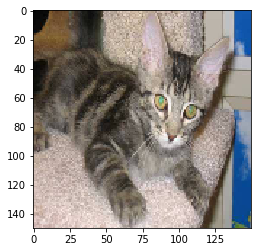

In [47]:
for data_batch,label_batch in train_generator :
    plt.imshow(data_batch[0])
    print(label_batch[0])
    break

In [48]:
model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=val_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 125s 1s/step - loss: 0.6911 - acc: 0.5400 - val_loss: 0.6810 - val_acc: 0.5460
Epoch 2/30
100/100 [==============================] - 82s 821ms/step - loss: 0.6658 - acc: 0.6125 - val_loss: 0.6475 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 84s 842ms/step - loss: 0.6248 - acc: 0.6690 - val_loss: 0.6340 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 83s 834ms/step - loss: 0.5862 - acc: 0.6820 - val_loss: 0.6078 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 82s 822ms/step - loss: 0.5406 - acc: 0.7255 - val_loss: 0.6054 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 82s 824ms/step - loss: 0.5047 - acc: 0.7515 - val_loss: 0.5924 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 83s 825ms/step - loss: 0.4703 - acc: 0.7760 - val_loss: 0.6280 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 83s